In [1]:
import pandas as pd
import numpy as np
import datastats as dt
import structdata as st
import timeseries as ts
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#Read in data set
# train_data = pd.read_csv('Xente/training.csv')
# test_data = pd.read_csv('Xente/test.csv')
# weather_data = pd.read_excel('Xente/WeatherNairobi2016.xls')
# sample_submission = pd.read_csv('Xente/sample_submission_xente.csv')

new_data = pd.read_csv('trainperf.csv')

In [2]:
date_cols = ['approveddate', 'creationdate']

df = ts.get_date_info(new_data, date_features=date_cols, drop_date_feature=True)

In [3]:
df.head(1).T

,0
customerid,8a2a81a74ce8c05d014cfb32a0da1049
systemloanid,301994762
loannumber,12
loanamount,30000
totaldue,34500
termdays,30
referredby,NaN
good_bad_flag,Good
approveddate_dates,2017-07-25 08:22:56
approveddate_dow,Tuesday


In [2]:
# train_data['Year'] = train_data.index.year
# train_data['Month'] = train_data.index.month
# train_data['Weekday Name'] = train_data.index.weekday_name
# train_data.head()

In [5]:
cols = ['dow', 'dom', 'yr']
data = ts.get_date_info(new_data, date_feat='approveddate', drop_date_feat=False, concatenate=True)

In [6]:
data.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,approveddate_dates,approveddate_dow,approveddate_doy,approveddate_dom,approveddate_hr,approveddate_minute,approveddate_is_wkd,approveddate_yr,approveddate_qtr,approveddate_mth
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good,2017-07-25 08:22:56,Tuesday,206,25,8,22,0,2017,3,7
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good,2017-07-05 17:04:41,Wednesday,186,5,17,4,0,2017,3,7
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good,2017-07-06 14:52:57,Thursday,187,6,14,52,0,2017,3,7
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good,2017-07-27 19:00:41,Thursday,208,27,19,0,0,2017,3,7
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good,2017-07-03 23:42:45,Monday,184,3,23,42,0,2017,3,7


In [10]:
new_data['dateapproveddate'] = pd.to_datetime(new_data['approveddate'])

df = new_data
date_feat = 'approveddate'

dict_dates = {"dow":  df["date" + date_feat].dt.weekday_name,
              "doy":   df["date" + date_feat].dt.dayofyear,
              "dom": df["date" + date_feat].dt.day,
              "hr": df["date" + date_feat].dt.hour,
              "minute":   df["date" + date_feat].dt.minute,
              "is_wkd":  df["date" + date_feat].apply( lambda x : 1 if x  in [5,6] else 0 ),
              "yr": df["date" + date_feat].dt.year,
              "qtr":  df["date" + date_feat].dt.quarter,
              "mth": df["date" + date_feat].dt.month
             } 

dd = ['dow', 'mth']

for d in dd:
    df['approveddate_' + d] = dict_dates[d]
    

In [11]:
df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,dateapproveddate,approveddate_dow,approveddate_mth
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good,2017-07-25 08:22:56,Tuesday,7
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good,2017-07-05 17:04:41,Wednesday,7
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good,2017-07-06 14:52:57,Thursday,7
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good,2017-07-27 19:00:41,Thursday,7
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good,2017-07-03 23:42:45,Monday,7


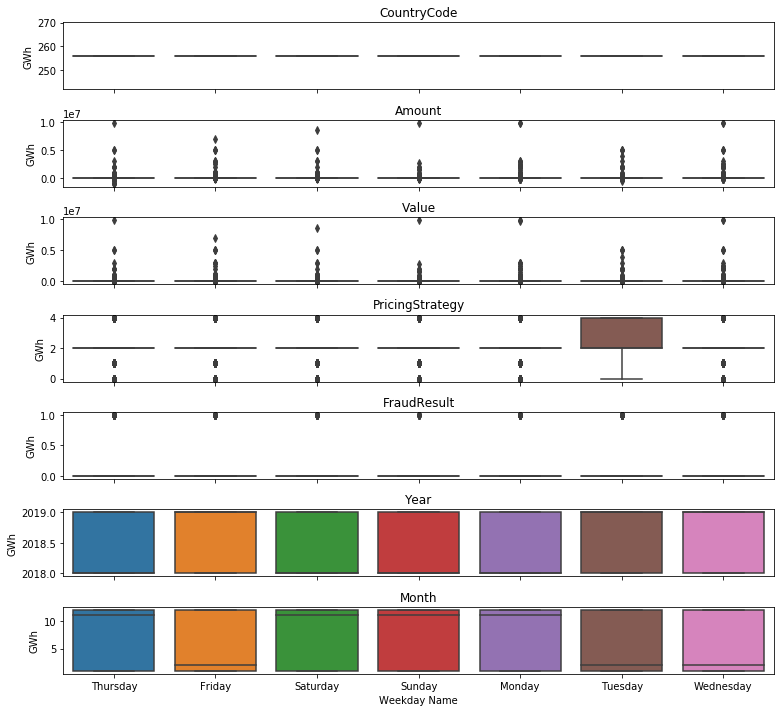

In [28]:
fig, axes = plt.subplots(len(dt.get_num_feats(train_data)), 1, figsize=(11, 10), sharex=True)
for name, ax in zip(dt.get_num_feats(train_data), axes):
    sns.boxplot(data=train_data, x='Weekday Name', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    plt.tight_layout()

    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

In [17]:
dt.get_cat_feats(train_data)

['TransactionId',
 'BatchId',
 'AccountId',
 'SubscriptionId',
 'CustomerId',
 'CurrencyCode',
 'ProviderId',
 'ProductId',
 'ProductCategory',
 'ChannelId',
 'Weekday Name']